In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [3]:
df = pd.read_csv('Datasets/winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [8]:
df.loc[:, 'quality'] = df['quality'].map(quality_mapping)

In [9]:
df['quality'].value_counts().sort_index()

quality
0     10
1     53
2    681
3    638
4    199
5     18
Name: count, dtype: int64

In [10]:
df.shape

(1599, 12)

In [11]:
# use sample with frac=1 to shuffle the dataframe 
# we reset the indices since they change after 
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df_train = df.head(1000)
df_test = df.head(599)

In [13]:
# train a decision tree model for this
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
clf = DecisionTreeClassifier(max_depth=7)

In [15]:
cols = ['fixed acidity',  
'volatile acidity',  
'citric acid', 
'residual sugar', 
'chlorides', 
'free sulfur dioxide', 
'total sulfur dioxide', 
'density', 
'pH', 
'sulphates', 
'alcohol'] 

In [16]:
clf.fit(df_train[cols], df_train['quality'])

DecisionTreeClassifier(max_depth=7)

In [17]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set 
test_predictions = clf.predict(df_test[cols])

In [18]:
# calculate the accuracy of predictions on 
# training data set
train_accuracy = accuracy_score(df_train['quality'], train_predictions)

# calculate the accuracy of predictions on 
# test data set
test_accuracy = accuracy_score(df_test['quality'], test_predictions)

In [19]:
print(train_accuracy)
print(test_accuracy)

0.756
0.7612687813021702


In [20]:
# initialize lists to store accuracies 
# for training and test data 
# we start with 50% accuracy 
train_accuracies = [0.5] 
test_accuracies = [0.5] 

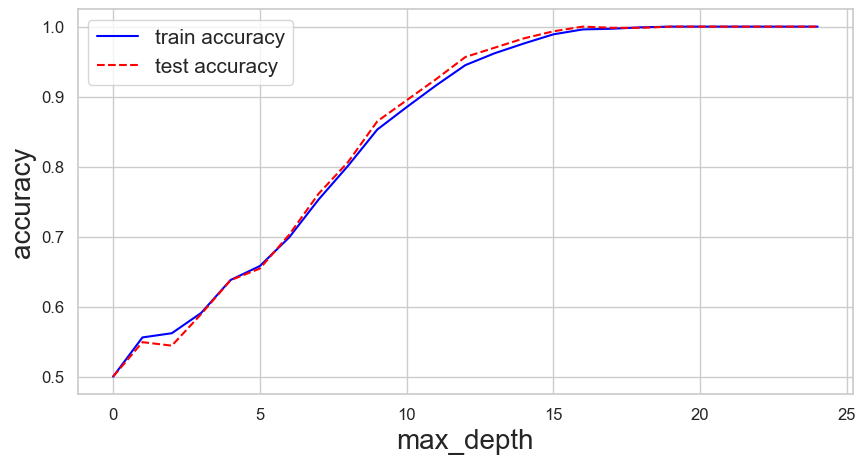

In [21]:
# iterate over a few depth values 
for depth in range(1, 25): 
    # init the model 
    clf = DecisionTreeClassifier(max_depth=depth) 
    # columns/features for training 
    # note that, this can be done outside  
    # the loop 
    cols = [ 
    'fixed acidity',  
    'volatile acidity', 
    'citric acid',  
    'residual sugar', 
    'chlorides', 
    'free sulfur dioxide',  
    'total sulfur dioxide', 
    'density', 
    'pH',  
    'sulphates', 
    'alcohol' 
    ] 
    # fit the model on given features 
    clf.fit(df_train[cols], df_train.quality) 
    
    # create training & test predictions 
    train_predictions = clf.predict(df_train[cols]) 
    test_predictions = clf.predict(df_test[cols])
    
    # calculate training & test accuracies 
    train_accuracy = accuracy_score( 
    df_train.quality, train_predictions 
    ) 
    test_accuracy = accuracy_score( 
    df_test.quality, test_predictions 
    ) 
    
    # append accuracies 
    train_accuracies.append(train_accuracy) 
    test_accuracies.append(test_accuracy)  
    
# create two plots using matplotlib 
# and seaborn 
plt.figure(figsize=(10, 5))

# Plot train accuracy with a specific color and solid line
plt.plot(train_accuracies, label="train accuracy", color='blue', linestyle='-')

# Plot test accuracy with a different color and dashed line
plt.plot(test_accuracies, label="test accuracy", color='red', linestyle='--')

# Adding legend, labels, and ticks
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)

# Show the plot
plt.show()